In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows',None)

In [5]:
#download data
def download_data(stock,start,end,interval):
    data = yf.download(stock,start,end,interval='1d')
    return data

In [6]:
data=download_data('^NSEI','2015-1-1','2020-12-31',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [12]:

def another_calculate_returns(data):
    '''
      ##last day, return greater than 1.00 is PROFIT otherwise
    #return less than 1.00 is LOSS
    '''
    #data['p_return'] = data['Close'].pct_change()
    bnh = ((data['Close'].pct_change())+1).cumprod()[-1]
    s_returns = (data['strategy_return']+1).cumprod()[-1]
    #data['p_return'] = data['Close'].pct_change()
    #data['BH'] =( data['p_return']+1).cumprod()
    
    return bnh, s_returns




In [13]:
##backtest strategy
def backtest_strategy(df,sma,mma,lma,print_chart=False):
    global data
    data = df.copy()
    
    data['sma'] = data['Close'].rolling(window=sma).mean()
    data['mma'] = data['Close'].rolling(window=mma).mean()
    data['lma'] = data['Close'].rolling(window=lma).mean()
    
    # Generating long entry signals
    data['signal'] = np.where((data['Close'] > data['sma']) &
                             (data['Close'] > data['mma']) &
                             (data['Close'] > data['lma']),1,0)
    # Generating long exit signals
    data['signal'] = np.where((data['Close'] < data['sma']) &
                             (data['Close'] > data['lma']),0,data['signal'])
    
    #generating short entry signals
    data['signal'] = np.where((data['Close'] < data['sma']) &
                             (data['Close'] < data['mma']) &
                             (data['Close'] < data['lma']),-1,data['signal'])
    # Generating short exit signals
    data['signal'] = np.where((data['Close'] > data['sma']) &
                             (data['Close'] < data['lma']),0,data['signal'])
    
    #Buy and Hold Returns
    
    ##last day, return in positive is profit and
    #return in negative is loss
    data['daily_return'] = np.log(data['Close'] / data['Close'].shift(1))
    data['Cumm_daily_return'] = data['daily_return'].cumsum()
    bnh = np.round(data['daily_return'].cumsum()[-1],4)
    
    
    
    #strategy Returns
    data['position'] = data['signal'].shift(1)
    data['strategy_return'] = data['daily_return'] * data['position']
    data['Cumm_strategy_return'] = data['strategy_return'].cumsum()
    strategy_return = np.round(data['strategy_return'].cumsum()[-1],4)
    
    #display chart if condition is True
    if print_chart == True:
        data[['Cumm_daily_return','Cumm_strategy_return']].plot(figsize=(18,8))
    return [bnh, strategy_return]
    
    

[0.5101, 0.4668]

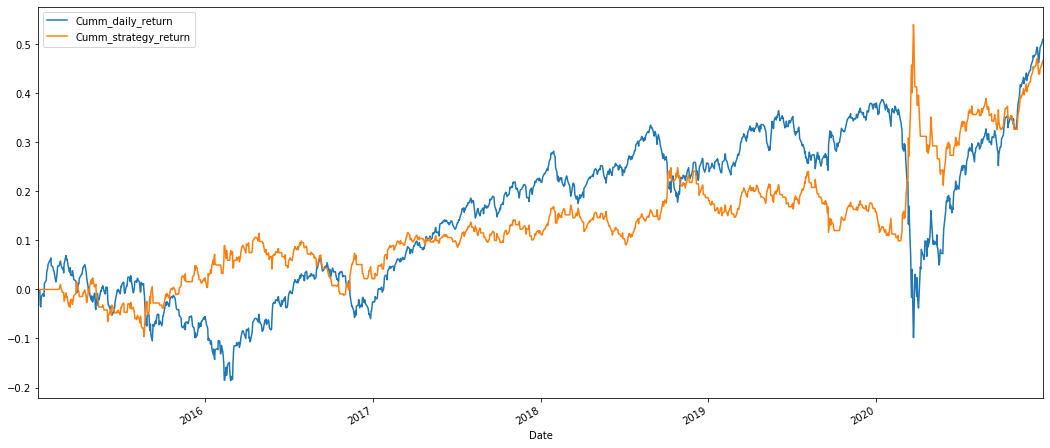

In [14]:
backtest_strategy(data,10,20,30,True)

In [15]:
#print the buy and hold return, strategy return
def calculate_return(data):
    '''
    calculate Buy and Hold return and
    Strategy Return
    '''
    bnh = data['daily_return'].cumsum()[-1]
    print('Buy and Hold return: ',np.round(bnh,4))
    
    strategy_return = data['strategy_return'].cumsum()[-1]
    print('Strategy Return: ',np.round(strategy_return,4))

In [16]:
calculate_return(data)

Buy and Hold return:  0.5101
Strategy Return:  0.4668


In [19]:
data

Open          High           Low         Close  \
Date                                                                 
2015-01-02   8288.700195   8410.599609   8288.700195   8395.450195   
2015-01-05   8407.950195   8445.599609   8363.900391   8378.400391   
2015-01-06   8325.299805   8327.849609   8111.350098   8127.350098   
2015-01-07   8118.649902   8151.200195   8065.450195   8102.100098   
2015-01-08   8191.399902   8243.500000   8167.299805   8234.599609   
2015-01-09   8285.450195   8303.299805   8190.799805   8284.500000   
2015-01-12   8291.349609   8332.599609   8245.599609   8323.000000   
2015-01-13   8346.150391   8356.650391   8267.900391   8299.400391   
2015-01-14   8307.250000   8326.450195   8236.650391   8277.549805   
2015-01-15   8424.500000   8527.099609   8380.549805   8494.150391   
2015-01-16   8504.049805   8530.750000   8452.250000   8513.799805   
2015-01-19   8550.049805   8570.950195   8531.500000   8550.700195   
2015-01-20   8575.099609   8707.900391   8574.500000   8695.599609   
2015-01-21   8719.650391   8741.849609   8689.599609   8729.500000   
2015-01-22   8745.849609   8774.150391   8727.000000   8761.400391   
2015-01-23   8827.950195   8866.400391   8795.400391   8835.599609   
2015-01-27   8871.349609   8925.049805   8825.450195   8910.500000   
2015-01-28   8902.750000   8985.049805   8874.049805   8914.299805   
2015-01-29   8901.500000   8966.650391   8861.250000   8952.349609   
2015-01-30   8996.599609   8996.599609   8775.099609   8808.900391   
2015-02-02   8802.500000   8840.799805   8751.099609   8797.400391   
2015-02-03   8823.150391   8837.299805   8726.650391   8756.549805   
2015-02-04   8789.150391   8792.849609   8704.400391   8723.700195   
2015-02-05   8733.099609   8838.450195   8683.650391   8711.700195   
2015-02-06   8696.849609   8726.200195   8645.549805   8661.049805   
2015-02-09   8584.400391   8605.549805   8516.349609   8526.349609   
2015-02-10   8478.099609   8646.250000   8470.500000   8565.549805   
2015-02-11   8603.299805   8651.950195   8593.650391   8627.400391   
2015-02-12   8676.950195   8732.549805   8599.250000   8711.549805   
2015-02-13   8741.500000   8822.099609   8729.650391   8805.500000   
2015-02-16   8831.400391   8870.099609   8793.400391   8809.349609   
2015-02-18   8811.549805   8894.299805   8808.900391   8869.099609   
2015-02-19   8883.049805   8913.450195   8794.450195   8895.299805   
2015-02-20   8895.500000   8899.950195   8816.299805   8833.599609   
2015-02-23   8856.849609   8869.000000   8736.099609   8754.950195   
2015-02-24   8772.900391   8800.500000   8726.750000   8762.099609   
2015-02-25   8801.900391   8840.650391   8751.400391   8767.250000   
2015-02-26   8779.000000   8786.049805   8669.450195   8683.849609   
2015-02-27   8729.500000   8856.950195   8717.450195   8844.599609   
2015-03-02   8953.849609   8972.349609   8885.450195   8956.750000   
2015-03-03   8962.849609   9008.400391   8925.549805   8996.250000   
2015-03-04   9109.150391   9119.200195   8893.950195   8922.650391   
2015-03-05   8929.400391   8957.549805   8849.349609   8937.750000   
2015-03-09   8891.150391   8891.299805   8740.450195   8756.750000   
2015-03-10   8769.750000   8778.000000   8677.349609   8712.049805   
2015-03-11   8728.750000   8755.599609   8682.349609   8699.950195   
2015-03-12   8740.650391   8787.200195   8732.900391   8776.000000   
2015-03-13   8844.049805   8849.750000   8631.750000   8647.750000   
2015-03-16   8656.750000   8663.549805   8612.000000   8633.150391   
2015-03-17   8689.099609   8742.549805   8630.799805   8723.299805   
2015-03-18   8742.900391   8747.250000   8664.000000   8685.900391   
2015-03-19   8749.450195   8788.200195   8614.650391   8634.650391   
2015-03-20   8627.900391   8627.900391   8553.000000   8570.900391   
2015-03-23   8591.549805   8608.349609   8540.549805   8550.900391   
2015-03-24   8537.049805   8627.750000   8535.849609   8542.950195   
2015-03-25   8568.900391   857

In [25]:
def plot_chart(data):
    '''
    plot chart with moving average and position
    '''
    data[['position','sma','mma','lma','Close']].plot(figsize=(18,8), secondary_y='position')
    plt.title("Buy and Hold vs Crossover strategy cummulative returns")
    plt.show()

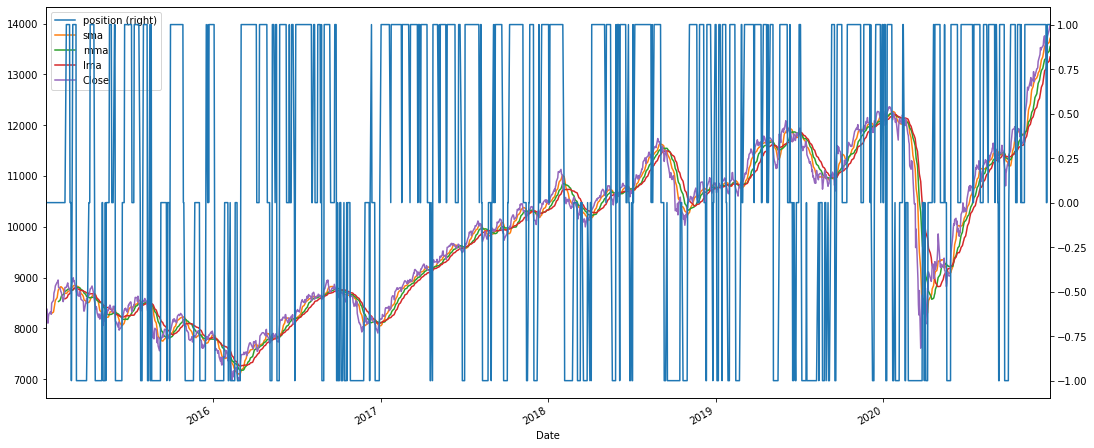

In [26]:
plot_chart(data)

In [56]:
## Strategy Optimization
def optimize_parameter(sma_range,mma_range,lma_range):
    opt_para = pd.DataFrame()
    for ma_short in sma_range:
        for ma_middle in mma_range:
            for ma_long in lma_range:
                res = backtest_strategy(data,ma_short,ma_middle,ma_long,False)
                opt_para = opt_para.append(pd.DataFrame({'ma_short':ma_short,
                                                        'ma_middle':ma_middle,
                                                        'ma_long':ma_long,
                                                        'BnH':res[0],
                                                        'STRAT':res[1],
                                                        'Outperf':res[1]-res[0]},
                                                       index=[0,]),
                                          ignore_index=True)
    opt_para = opt_para.sort_values('STRAT',ascending=False)
    return opt_para
    #return opt_para.iloc[0]

In [57]:
optimize_parameter(sma_range=range(30,40,2), mma_range=range(60,75,3),lma_range=range(100,115,5))

ma_short  ma_middle  ma_long     BnH   STRAT  Outperf
57        36         72      100  0.5101  0.7133   0.2032
51        36         66      100  0.5101  0.7091   0.1990
48        36         63      100  0.5101  0.7091   0.1990
45        36         60      100  0.5101  0.7091   0.1990
54        36         69      100  0.5101  0.7029   0.1928
27        32         72      100  0.5101  0.6836   0.1735
58        36         72      105  0.5101  0.6835   0.1734
59        36         72      110  0.5101  0.6805   0.1704
42        34         72      100  0.5101  0.6802   0.1701
15        32         60      100  0.5101  0.6794   0.1693
21        32         66      100  0.5101  0.6794   0.1693
18        32         63      100  0.5101  0.6794   0.1693
49        36         63      105  0.5101  0.6793   0.1692
52        36         66      105  0.5101  0.6793   0.1692
46        36         60      105  0.5101  0.6793   0.1692
53        36         66      110  0.5101  0.6763   0.1662
47        36         60      110  0.5101  0.6763   0.1662
50        36         63      110  0.5101  0.6763   0.1662
30        34         60      100  0.5101  0.6760   0.1659
33        34         63      100  0.5101  0.6760   0.1659
36        34         66      100  0.5101  0.6760   0.1659
24        32         69      100  0.5101  0.6732   0.1631
55        36         69      105  0.5101  0.6731   0.1630
56        36         69      110  0.5101  0.6701   0.1600
39        34         69      100  0.5101  0.6698   0.1597
28        32         72      105  0.5101  0.6670   0.1569
29        32         72      110  0.5101  0.6640   0.1539
16        32         60      105  0.5101  0.6627   0.1526
19        32         63      105  0.5101  0.6627   0.1526
22        32         66      105  0.5101  0.6627   0.1526
17        32         60      110  0.5101  0.6597   0.1496
23        32         66      110  0.5101  0.6597   0.1496
20        32         63      110  0.5101  0.6597   0.1496
25        32         69      105  0.5101  0.6565   0.1464
72        38         72      100  0.5101  0.6542   0.1441
26        32         69      110  0.5101  0.6535   0.1434
43        34         72      105  0.5101  0.6504   0.1403
60        38         60      100  0.5101  0.6499   0.1398
63        38         63      100  0.5101  0.6499   0.1398
66        38         66      100  0.5101  0.6499   0.1398
44        34         72      110  0.5101  0.6474   0.1373
34        34         63      105  0.5101  0.6462   0.1361
31        34         60      105  0.5101  0.6462   0.1361
37        34         66      105  0.5101  0.6462   0.1361
69        38         69      100  0.5101  0.6437   0.1336
35        34         63      110  0.5101  0.6432   0.1331
38        34         66      110  0.5101  0.6432   0.1331
32        34         60      110  0.5101  0.6432   0.1331
40        34         69      105  0.5101  0.6400   0.1299
41        34         69      110  0.5101  0.6370   0.1269
12        30         72      100  0.5101  0.6260   0.1159
73        38         72      105  0.5101  0.6244   0.1143
0         30         60      100  0.5101  0.6218   0.1117
3         30         63      100  0.5101  0.6218   0.1117
6         30         66      100  0.5101  0.6218   0.1117
74        38         72      110  0.5101  0.6214   0.1113
61        38         60      105  0.5101  0.6201   0.1100
67        38         66      105  0.5101  0.6201   0.1100
64        38         63      105  0.5101  0.6201   0.1100
62        38         60      110  0.5101  0.6171   0.1070
65        38         63      110  0.5101  0.6171   0.1070
68        38         66      110  0.5101  0.6171   0.1070
9         30         69      100  0.5101  0.6156   0.1055
70        38         69      105  0.5101  0.6139   0.1038
71        38         69      110  0.5101  0.6109   0.1008
13        30         72      105  0.5101  0.6093   0.0992
14        30         72      110  0.5101  0.6063   0.0962
7         30         66      105  0.5101  0.6051   0.0950
4 

In [59]:
optimize_parameter(sma_range=range(1,10), mma_range=range(2,20),lma_range=range(5,50))

ma_short  ma_middle  ma_long     BnH   STRAT  Outperf
4576         6         13       36  0.5101  0.6912   0.1811
4531         6         12       36  0.5101  0.6879   0.1778
4574         6         13       34  0.5101  0.6765   0.1664
4575         6         13       35  0.5101  0.6734   0.1633
4529         6         12       34  0.5101  0.6731   0.1630
4530         6         12       35  0.5101  0.6701   0.1600
4486         6         11       36  0.5101  0.6682   0.1581
4532         6         12       37  0.5101  0.6598   0.1497
4846         6         19       36  0.5101  0.6590   0.1489
4261         6          6       36  0.5101  0.6554   0.1453
4484         6         11       34  0.5101  0.6534   0.1433
4621         6         14       36  0.5101  0.6521   0.1420
4577         6         13       37  0.5101  0.6517   0.1416
4485         6         11       35  0.5101  0.6504   0.1403
4441         6         10       36  0.5101  0.6504   0.1403
5881         8          6       36  0.5101  0.6481   0.1380
4351         6          8       36  0.5101  0.6481   0.1380
4844         6         19       34  0.5101  0.6442   0.1341
4306         6          7       36  0.5101  0.6430   0.1329
5071         7          6       36  0.5101  0.6430   0.1329
5386         7         13       36  0.5101  0.6423   0.1322
4572         6         13       32  0.5101  0.6419   0.1318
4573         6         13       33  0.5101  0.6418   0.1317
4845         6         19       35  0.5101  0.6412   0.1311
4527         6         12       32  0.5101  0.6403   0.1302
4487         6         11       37  0.5101  0.6401   0.1300
5341         7         12       36  0.5101  0.6390   0.1289
5296         7         11       36  0.5101  0.6386   0.1285
4528         6         12       33  0.5101  0.6384   0.1283
4260         6          6       35  0.5101  0.6376   0.1275
4619         6         14       34  0.5101  0.6374   0.1273
4439         6         10       34  0.5101  0.6356   0.1255
4620         6         14       35  0.5101  0.6343   0.1242
4440         6         10       35  0.5101  0.6326   0.1225
4801         6         18       36  0.5101  0.6322   0.1221
4533         6         12       38  0.5101  0.6304   0.1203
4350         6          8       35  0.5101  0.6303   0.1202
5880         8          6       35  0.5101  0.6303   0.1202
4526         6         12       31  0.5101  0.6279   0.1178
5656         7         19       36  0.5101  0.6277   0.1176
4262         6          6       37  0.5101  0.6260   0.1159
4571         6         13       31  0.5101  0.6255   0.1154
5879         8          6       34  0.5101  0.6255   0.1154
4349         6          8       34  0.5101  0.6255   0.1154
4305         6          7       35  0.5101  0.6251   0.1150
5070         7          6       35  0.5101  0.6251   0.1150
5385         7         13       35  0.5101  0.6245   0.1144
4538         6         12       43  0.5101  0.6241   0.1140
4578         6         13       38  0.5101  0.6223   0.1122
4442         6         10       37  0.5101  0.6223   0.1122
5340         7         12       35  0.5101  0.6212   0.1111
4534         6         12       39  0.5101  0.6211   0.1110
4354         6          8       39  0.5101  0.6208   0.1107
5884         8          6       39  0.5101  0.6208   0.1107
4396         6          9       36  0.5101  0.6208   0.1107
6691         9          6       36  0.5101  0.6208   0.1107
5295         7         11       35  0.5101  0.6207   0.1106
4482         6         11       32  0.5101  0.6206   0.1105
4304         6          7       34  0.5101  0.6204   0.1103
4524         6         12       29  0.5101  0.6204   0.1103
5069         7          6       34  0.5101  0.6204   0.1103
4352         6          8       37  0.5101  0.6200   0.1099
5882         8          6       37  0.5101  0.6200   0.1099
4847         6         19       37  0.5101  0.6195   0.1094
4483         6         11       33  0.5101  0.6187   0.1086
6106         8         11       36  0.5101  0.

[0.5101, 0.7133]

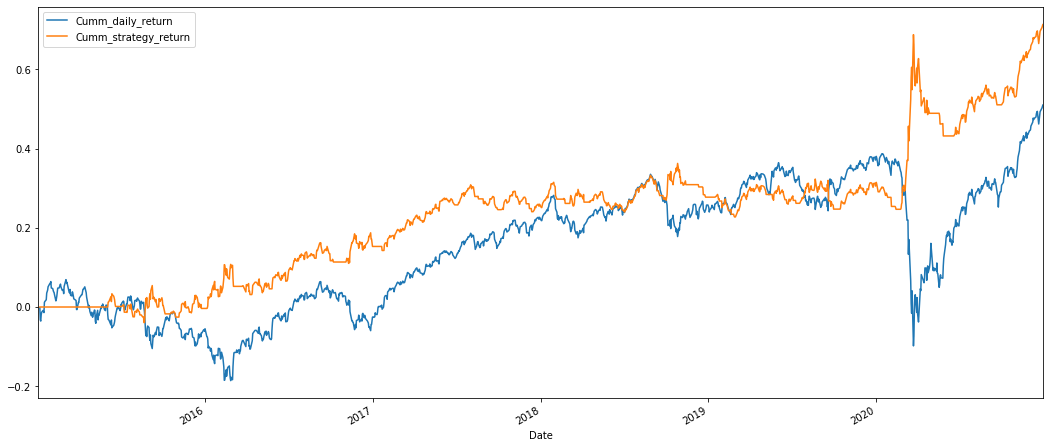

In [60]:
backtest_strategy(data,36,72,100,True)

### SBI

In [61]:
data=download_data('SBIN.NS','2015-1-1','2020-12-31',interval='1d')

[*********************100%***********************]  1 of 1 completed


[-0.1257, 0.4196]

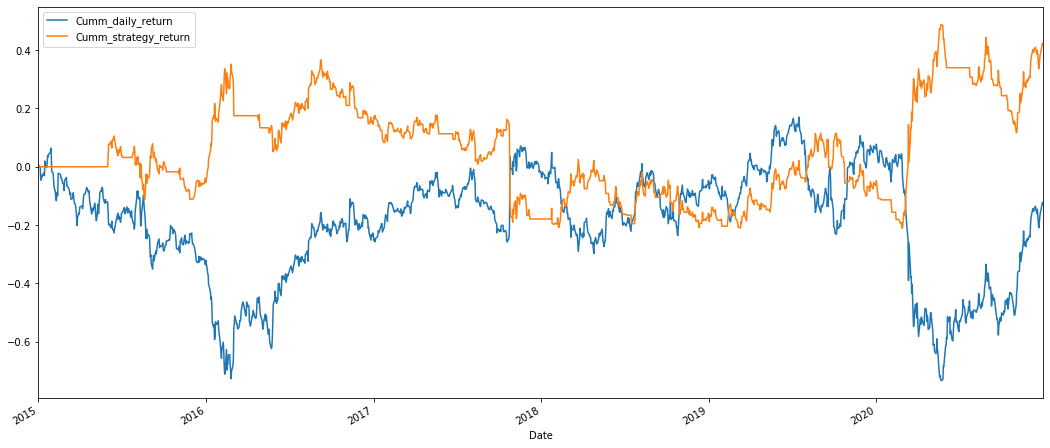

In [62]:
backtest_strategy(data,36,72,100,True)

In [63]:
optimize_parameter(sma_range=range(30,40,2), mma_range=range(60,75,3),lma_range=range(100,115,5))

ma_short  ma_middle  ma_long     BnH   STRAT  Outperf
68        38         66      110 -0.1257  0.5428   0.6685
71        38         69      110 -0.1257  0.5382   0.6639
67        38         66      105 -0.1257  0.5230   0.6487
70        38         69      105 -0.1257  0.5184   0.6441
74        38         72      110 -0.1257  0.5164   0.6421
26        32         69      110 -0.1257  0.5124   0.6381
38        34         66      110 -0.1257  0.5083   0.6340
65        38         63      110 -0.1257  0.5081   0.6338
66        38         66      100 -0.1257  0.5064   0.6321
41        34         69      110 -0.1257  0.5037   0.6294
69        38         69      100 -0.1257  0.5018   0.6275
53        36         66      110 -0.1257  0.4986   0.6243
73        38         72      105 -0.1257  0.4966   0.6223
56        36         69      110 -0.1257  0.4940   0.6197
25        32         69      105 -0.1257  0.4927   0.6184
29        32         72      110 -0.1257  0.4906   0.6163
37        34         66      105 -0.1257  0.4886   0.6143
64        38         63      105 -0.1257  0.4884   0.6141
40        34         69      105 -0.1257  0.4840   0.6097
44        34         72      110 -0.1257  0.4819   0.6076
52        36         66      105 -0.1257  0.4789   0.6046
23        32         66      110 -0.1257  0.4768   0.6025
24        32         69      100 -0.1257  0.4760   0.6017
55        36         69      105 -0.1257  0.4743   0.6000
35        34         63      110 -0.1257  0.4737   0.5994
59        36         72      110 -0.1257  0.4722   0.5979
36        34         66      100 -0.1257  0.4719   0.5976
63        38         63      100 -0.1257  0.4717   0.5974
28        32         72      105 -0.1257  0.4709   0.5966
39        34         69      100 -0.1257  0.4673   0.5930
50        36         63      110 -0.1257  0.4640   0.5897
72        38         72      100 -0.1257  0.4638   0.5895
51        36         66      100 -0.1257  0.4622   0.5879
43        34         72      105 -0.1257  0.4622   0.5879
54        36         69      100 -0.1257  0.4576   0.5833
22        32         66      105 -0.1257  0.4570   0.5827
34        34         63      105 -0.1257  0.4540   0.5797
58        36         72      105 -0.1257  0.4525   0.5782
11        30         69      110 -0.1257  0.4443   0.5700
49        36         63      105 -0.1257  0.4443   0.5700
20        32         63      110 -0.1257  0.4421   0.5678
21        32         66      100 -0.1257  0.4404   0.5661
27        32         72      100 -0.1257  0.4380   0.5637
33        34         63      100 -0.1257  0.4373   0.5630
42        34         72      100 -0.1257  0.4294   0.5551
48        36         63      100 -0.1257  0.4276   0.5533
10        30         69      105 -0.1257  0.4246   0.5503
14        30         72      110 -0.1257  0.4225   0.5482
60        38         60      100 -0.1257  0.4225   0.5482
19        32         63      105 -0.1257  0.4224   0.5481
57        36         72      100 -0.1257  0.4196   0.5453
8         30         66      110 -0.1257  0.4087   0.5344
18        32         63      100 -0.1257  0.4057   0.5314
13        30         72      105 -0.1257  0.4028   0.5285
62        38         60      110 -0.1257  0.3951   0.5208
7         30         66      105 -0.1257  0.3889   0.5146
30        34         60      100 -0.1257  0.3880   0.5137
45        36         60      100 -0.1257  0.3783   0.5040
9         30         69      100 -0.1257  0.3781   0.5038
61        38         60      105 -0.1257  0.3773   0.5030
32        34         60      110 -0.1257  0.3607   0.4864
15        32         60      100 -0.1257  0.3526   0.4783
5         30         63      110 -0.1257  0.3520   0.4777
47        36         60      110 -0.1257  0.3509   0.4766
31        34         60      105 -0.1257  0.3429   0.4686
6         30         66      100 -0.1257  0.3425   0.4682
12        30         72      100 -0.1257  0.3402   0.4659
46        36         60      105 -0.1257  0.3331   0.4588
4 

[-0.1257, 0.5428]

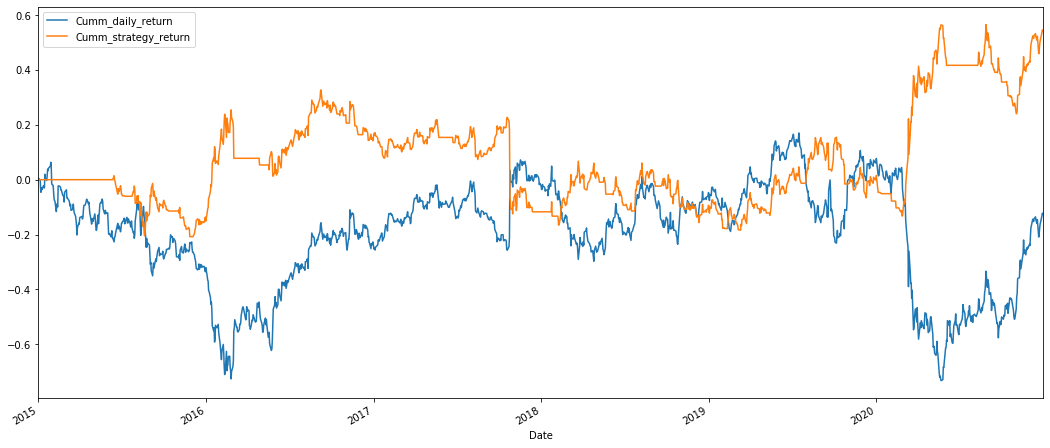

In [66]:
backtest_strategy(data,38,66,110,True)

In [67]:
data=download_data('SBIN.NS','2018-1-1','2019-12-31',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [68]:
optimize_parameter(sma_range=range(30,40,2), mma_range=range(60,75,3),lma_range=range(100,115,5))

ma_short  ma_middle  ma_long     BnH   STRAT  Outperf
43        34         72      105  0.0852  0.1241   0.0389
58        36         72      105  0.0852  0.1134   0.0282
73        38         72      105  0.0852  0.1004   0.0152
44        34         72      110  0.0852  0.0975   0.0123
40        34         69      105  0.0852  0.0946   0.0094
37        34         66      105  0.0852  0.0894   0.0042
59        36         72      110  0.0852  0.0868   0.0016
55        36         69      105  0.0852  0.0839  -0.0013
52        36         66      105  0.0852  0.0787  -0.0065
74        38         72      110  0.0852  0.0738  -0.0114
70        38         69      105  0.0852  0.0709  -0.0143
34        34         63      105  0.0852  0.0707  -0.0145
31        34         60      105  0.0852  0.0707  -0.0145
41        34         69      110  0.0852  0.0680  -0.0172
28        32         72      105  0.0852  0.0679  -0.0173
67        38         66      105  0.0852  0.0657  -0.0195
38        34         66      110  0.0852  0.0628  -0.0224
46        36         60      105  0.0852  0.0600  -0.0252
49        36         63      105  0.0852  0.0600  -0.0252
56        36         69      110  0.0852  0.0573  -0.0279
53        36         66      110  0.0852  0.0521  -0.0331
64        38         63      105  0.0852  0.0470  -0.0382
61        38         60      105  0.0852  0.0470  -0.0382
13        30         72      105  0.0852  0.0448  -0.0404
71        38         69      110  0.0852  0.0443  -0.0409
35        34         63      110  0.0852  0.0441  -0.0411
32        34         60      110  0.0852  0.0422  -0.0430
29        32         72      110  0.0852  0.0413  -0.0439
42        34         72      100  0.0852  0.0407  -0.0445
68        38         66      110  0.0852  0.0391  -0.0461
25        32         69      105  0.0852  0.0384  -0.0468
50        36         63      110  0.0852  0.0334  -0.0518
22        32         66      105  0.0852  0.0332  -0.0520
47        36         60      110  0.0852  0.0315  -0.0537
57        36         72      100  0.0852  0.0299  -0.0553
39        34         69      100  0.0852  0.0273  -0.0579
36        34         66      100  0.0852  0.0221  -0.0631
65        38         63      110  0.0852  0.0204  -0.0648
62        38         60      110  0.0852  0.0185  -0.0667
14        30         72      110  0.0852  0.0182  -0.0670
72        38         72      100  0.0852  0.0170  -0.0682
54        36         69      100  0.0852  0.0166  -0.0686
10        30         69      105  0.0852  0.0153  -0.0699
16        32         60      105  0.0852  0.0145  -0.0707
19        32         63      105  0.0852  0.0145  -0.0707
26        32         69      110  0.0852  0.0118  -0.0734
51        36         66      100  0.0852  0.0114  -0.0738
7         30         66      105  0.0852  0.0101  -0.0751
23        32         66      110  0.0852  0.0066  -0.0786
69        38         69      100  0.0852  0.0037  -0.0815
33        34         63      100  0.0852  0.0034  -0.0818
30        34         60      100  0.0852  0.0034  -0.0818
66        38         66      100  0.0852 -0.0016  -0.0868
45        36         60      100  0.0852 -0.0073  -0.0925
48        36         63      100  0.0852 -0.0073  -0.0925
4         30         63      105  0.0852 -0.0086  -0.0938
1         30         60      105  0.0852 -0.0086  -0.0938
11        30         69      110  0.0852 -0.0113  -0.0965
20        32         63      110  0.0852 -0.0121  -0.0973
17        32         60      110  0.0852 -0.0140  -0.0992
27        32         72      100  0.0852 -0.0156  -0.1008
8         30         66      110  0.0852 -0.0165  -0.1017
63        38         63      100  0.0852 -0.0203  -0.1055
60        38         60      100  0.0852 -0.0203  -0.1055
12        30         72      100  0.0852 -0.0245  -0.1097
24        32         69      100  0.0852 -0.0289  -0.1141
21        32         66      100  0.0852 -0.0341  -0.1193
5         30         63      110  0.0852 -0.0352  -0.1204
2 

In [69]:
optimize_parameter(sma_range=range(2,9), mma_range=range(5,20),lma_range=range(10,30))

ma_short  ma_middle  ma_long     BnH   STRAT  Outperf
519          3         15       29  0.0852  0.7438   0.6586
498          3         14       28  0.0852  0.7384   0.6532
438          3         11       28  0.0852  0.7382   0.6530
478          3         13       28  0.0852  0.7373   0.6521
499          3         14       29  0.0852  0.7323   0.6471
439          3         11       29  0.0852  0.7320   0.6468
479          3         13       29  0.0852  0.7312   0.6460
539          3         16       29  0.0852  0.7280   0.6428
418          3         10       28  0.0852  0.7275   0.6423
496          3         14       26  0.0852  0.7253   0.6401
436          3         11       26  0.0852  0.7250   0.6398
476          3         13       26  0.0852  0.7242   0.6390
493          3         14       23  0.0852  0.7234   0.6382
433          3         11       23  0.0852  0.7231   0.6379
473          3         13       23  0.0852  0.7222   0.6370
419          3         10       29  0.0852  0.7213   0.6361
518          3         15       28  0.0852  0.7209   0.6357
559          3         17       29  0.0852  0.7191   0.6339
416          3         10       26  0.0852  0.7144   0.6292
413          3         10       23  0.0852  0.7124   0.6272
358          3          7       28  0.0852  0.7117   0.6265
513          3         15       23  0.0852  0.7098   0.6246
516          3         15       26  0.0852  0.7077   0.6225
352          3          7       22  0.0852  0.7076   0.6224
497          3         14       27  0.0852  0.7069   0.6217
437          3         11       27  0.0852  0.7066   0.6214
477          3         13       27  0.0852  0.7058   0.6206
359          3          7       29  0.0852  0.7056   0.6204
538          3         16       28  0.0852  0.7051   0.6199
353          3          7       23  0.0852  0.7045   0.6193
492          3         14       22  0.0852  0.7033   0.6181
432          3         11       22  0.0852  0.7030   0.6178
472          3         13       22  0.0852  0.7022   0.6170
558          3         17       28  0.0852  0.6961   0.6109
417          3         10       27  0.0852  0.6960   0.6108
533          3         16       23  0.0852  0.6940   0.6088
412          3         10       22  0.0852  0.6923   0.6071
536          3         16       26  0.0852  0.6919   0.6067
458          3         12       28  0.0852  0.6908   0.6056
512          3         15       22  0.0852  0.6897   0.6045
517          3         15       27  0.0852  0.6893   0.6041
495          3         14       25  0.0852  0.6856   0.6004
435          3         11       25  0.0852  0.6854   0.6002
491          3         14       21  0.0852  0.6853   0.6001
431          3         11       21  0.0852  0.6851   0.5999
553          3         17       23  0.0852  0.6850   0.5998
459          3         12       29  0.0852  0.6846   0.5994
475          3         13       25  0.0852  0.6845   0.5993
471          3         13       21  0.0852  0.6842   0.5990
356          3          7       26  0.0852  0.6835   0.5983
556          3         17       26  0.0852  0.6830   0.5978
456          3         12       26  0.0852  0.6777   0.5925
378          3          8       28  0.0852  0.6773   0.5921
453          3         12       23  0.0852  0.6757   0.5905
415          3         10       25  0.0852  0.6747   0.5895
411          3         10       21  0.0852  0.6744   0.5892
532          3         16       22  0.0852  0.6739   0.5887
393          3          9       23  0.0852  0.6738   0.5886
537          3         16       27  0.0852  0.6735   0.5883
372          3          8       22  0.0852  0.6732   0.5880
351          3          7       21  0.0852  0.6732   0.5880
511          3         15       21  0.0852  0.6718   0.5866
379          3          8       29  0.0852  0.6711   0.5859
373          3          8       23  0.0852  0.6700   0.5848
515          3         15       25  0.0852  0.6681   0.5829
398          3          9       28  0.0852  0.

[0.0852, 0.7438]

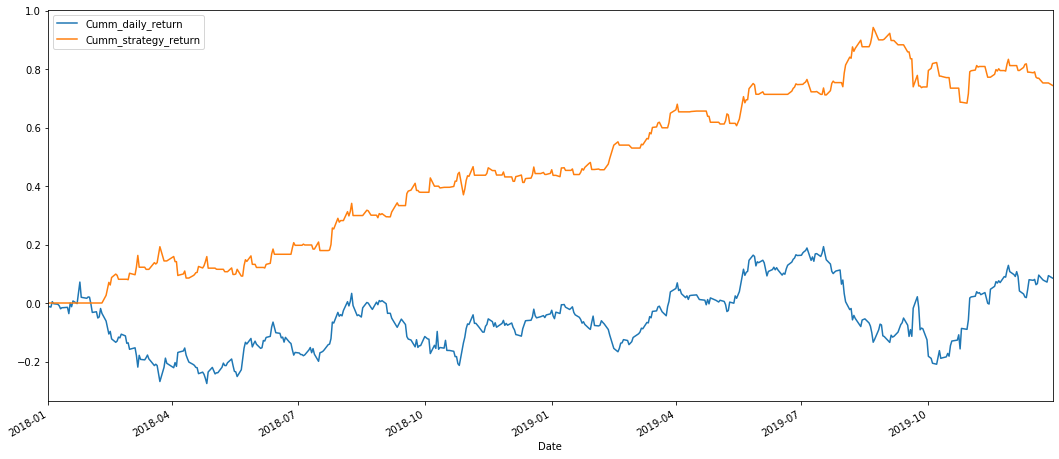

In [74]:
backtest_strategy(data,3,15,29,True)

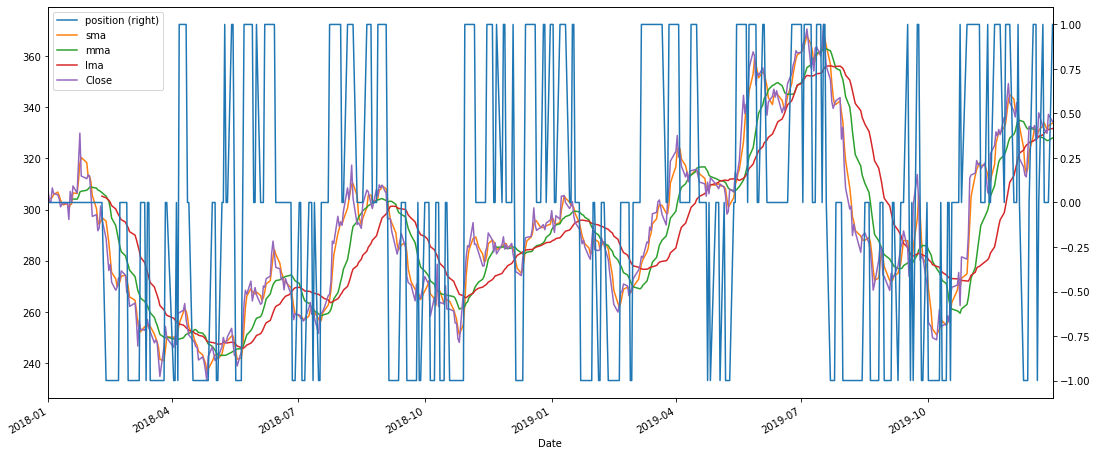

In [75]:
plot_chart(data)

In [90]:
data=download_data('SBIN.NS','2021-2-3','2021-2-6',interval='1m')

[*********************100%***********************]  1 of 1 completed


In [91]:
data

Open        High         Low       Close  \
Datetime                                                                    
2021-02-03 09:15:00+05:30  333.149994  334.750000  333.100006  333.700012   
2021-02-03 09:16:00+05:30  333.850006  334.000000  330.549988  330.549988   
2021-02-03 09:17:00+05:30  330.299988  330.450012  328.049988  328.149994   
2021-02-03 09:18:00+05:30  327.450012  327.600006  325.899994  326.700012   
2021-02-03 09:19:00+05:30  326.600006  329.000000  326.600006  327.799988   
2021-02-03 09:20:00+05:30  328.000000  329.100006  326.700012  328.750000   
2021-02-03 09:21:00+05:30  328.799988  331.100006  328.600006  330.700012   
2021-02-03 09:22:00+05:30  330.500000  331.000000  330.500000  330.799988   
2021-02-03 09:23:00+05:30  330.649994  331.399994  330.250000  330.450012   
2021-02-03 09:24:00+05:30  330.399994  330.399994  328.899994  329.250000   
2021-02-03 09:25:00+05:30  329.200012  329.799988  328.700012  329.049988   
2021-02-03 09:26:00+05:30  329.049988  331.100006  329.000000  330.700012   
2021-02-03 09:27:00+05:30  330.700012  331.000000  330.299988  330.750000   
2021-02-03 09:28:00+05:30  330.649994  333.149994  330.450012  332.299988   
2021-02-03 09:29:00+05:30  332.450012  332.850006  332.049988  332.100006   
2021-02-03 09:30:00+05:30  332.000000  333.100006  331.700012  332.250000   
2021-02-03 09:31:00+05:30  332.200012  332.799988  331.649994  332.000000   
2021-02-03 09:32:00+05:30  331.850006  331.950012  331.250000  331.399994   
2021-02-03 09:33:00+05:30  331.549988  331.799988  331.000000  331.299988   
2021-02-03 09:34:00+05:30  331.350006  331.350006  330.299988  330.299988   
2021-02-03 09:35:00+05:30  330.299988  330.950012  330.299988  330.750000   
2021-02-03 09:36:00+05:30  330.799988  330.899994  328.649994  329.049988   
2021-02-03 09:37:00+05:30  329.200012  329.799988  328.850006  329.549988   
2021-02-03 09:38:00+05:30  329.399994  329.750000  329.000000  329.399994   
2021-02-03 09:39:00+05:30  329.200012  330.200012  329.200012  330.000000   
2021-02-03 09:40:00+05:30  330.100006  330.700012  329.899994  330.700012   
2021-02-03 09:41:00+05:30  330.450012  330.750000  330.000000  330.399994   
2021-02-03 09:42:00+05:30  330.500000  331.250000  330.500000  331.100006   
2021-02-03 09:43:00+05:30  331.250000  331.399994  330.899994  330.899994   
2021-02-03 09:44:00+05:30  330.950012  331.399994  330.750000  330.750000   
2021-02-03 09:45:00+05:30  330.750000  330.750000  329.649994  330.000000   
2021-02-03 09:46:00+05:30  330.000000  330.000000  329.500000  329.799988   
2021-02-03 09:47:00+05:30  329.649994  330.200012  328.850006  329.700012   
2021-02-03 09:48:00+05:30  329.450012  330.299988  329.049988  330.000000   
2021-02-03 09:49:00+05:30  330.200012  331.100006  330.149994  330.549988   
2021-02-03 09:50:00+05:30  330.700012  331.950012  330.299988  331.600006   
2021-02-03 09:51:00+05:30  331.600006  331.649994  330.799988  331.200012   
2021-02-03 09:52:00+05:30  331.000000  331.299988  330.850006  331.000000   
2021-02-03 09:53:00+05:30  331.100006  331.500000  330.950012  331.299988   
2021-02-03 09:54:00+05:30  331.200012  331.399994  330.850006  331.000000   
2021-02-03 09:55:00+05:30  331.000000  331.350006  330.899994  331.000000   
2021-02-03 09:56:00+05:30  331.100006  331.350006  330.950012  331.200012   
2021-02-03 09:57:00+05:30  331.700012  332.200012  331.450012  331.899994   
2021-02-03 09:58:00+05:30  331.850006  331.950012  331.500000  331.649994   
2021-02-03 09:59:00+05:30  331.700012  331.750000  331.200012  331.450012   
2021-02-03 10:00:00+05:30  331.399994  331.750000  331.299988  331.350006   
2021-02-03 10:01:00+05:30  331.450012  331.450012  330.950012  330.950012   
2021-02-03 10:02:00+05:30  330.950012  331.149994  330.649994  331.149994   
2021-02-03 10:03:00+05:30  331.200012  331.450012  330.850006  330.950012   
2021-02-03 10:04:00+05:30  330.950012  330.950012  330.500000  330.649994   
2021-02-03 10:05:00+05:30  33

In [92]:
optimize_parameter(sma_range=range(1,10,2), mma_range=range(5,50,3),lma_range=range(10,100,5))

ma_short  ma_middle  ma_long     BnH   STRAT  Outperf
824          7          5       80  0.1686  0.1087  -0.0599
572          5          8       80  0.1686  0.1070  -0.0616
823          7          5       75  0.1686  0.1061  -0.0625
1292         9         38       80  0.1686  0.1060  -0.0626
571          5          8       75  0.1686  0.1051  -0.0635
1094         9          5       80  0.1686  0.1051  -0.0635
1022         7         38       80  0.1686  0.1045  -0.0641
1293         9         38       85  0.1686  0.1038  -0.0648
1291         9         38       75  0.1686  0.1038  -0.0648
1023         7         38       85  0.1686  0.1038  -0.0648
1093         9          5       75  0.1686  0.1032  -0.0654
1021         7         38       75  0.1686  0.1031  -0.0655
825          7          5       85  0.1686  0.1031  -0.0655
752          5         38       80  0.1686  0.1026  -0.0660
1274         9         35       80  0.1686  0.1019  -0.0667
1310         9         41       80  0.1686  0.1014  -0.0672
753          5         38       85  0.1686  0.1014  -0.0672
1041         7         41       85  0.1686  0.1012  -0.0674
751          5         38       75  0.1686  0.1012  -0.0674
1040         7         41       80  0.1686  0.1011  -0.0675
573          5          8       85  0.1686  0.1011  -0.0675
1095         9          5       85  0.1686  0.1001  -0.0685
1311         9         41       85  0.1686  0.0999  -0.0687
1039         7         41       75  0.1686  0.0997  -0.0689
1275         9         35       85  0.1686  0.0997  -0.0689
1273         9         35       75  0.1686  0.0997  -0.0689
827          7          5       95  0.1686  0.0995  -0.0691
1328         9         44       80  0.1686  0.0992  -0.0694
1309         9         41       75  0.1686  0.0992  -0.0694
1004         7         35       80  0.1686  0.0991  -0.0695
770          5         41       80  0.1686  0.0987  -0.0699
1005         7         35       85  0.1686  0.0984  -0.0702
771          5         41       85  0.1686  0.0983  -0.0703
826          7          5       90  0.1686  0.0979  -0.0707
1329         9         44       85  0.1686  0.0977  -0.0709
1003         7         35       75  0.1686  0.0977  -0.0709
769          5         41       75  0.1686  0.0973  -0.0713
554          5          5       80  0.1686  0.0973  -0.0713
1294         9         38       90  0.1686  0.0970  -0.0716
1059         7         44       85  0.1686  0.0970  -0.0716
1327         9         44       75  0.1686  0.0970  -0.0716
1058         7         44       80  0.1686  0.0969  -0.0717
734          5         35       80  0.1686  0.0966  -0.0720
575          5          8       95  0.1686  0.0963  -0.0723
1024         7         38       90  0.1686  0.0962  -0.0724
842          7          8       80  0.1686  0.0959  -0.0727
754          5         38       90  0.1686  0.0959  -0.0727
574          5          8       90  0.1686  0.0958  -0.0728
590          5         11       80  0.1686  0.0957  -0.0729
482          3         38       80  0.1686  0.0956  -0.0730
1057         7         44       75  0.1686  0.0955  -0.0731
735          5         35       85  0.1686  0.0955  -0.0731
788          5         44       80  0.1686  0.0954  -0.0732
733          5         35       75  0.1686  0.0952  -0.0734
302          3          8       80  0.1686  0.0951  -0.0735
789          5         44       85  0.1686  0.0950  -0.0736
1295         9         38       95  0.1686  0.0948  -0.0738
553          5          5       75  0.1686  0.0946  -0.0740
1097         9          5       95  0.1686  0.0944  -0.0742
787          5         44       75  0.1686  0.0940  -0.0746
1025         7         38       95  0.1686  0.0940  -0.0746
841          7          8       75  0.1686  0.0940  -0.0746
1096         9          5       90  0.1686  0.0939  -0.0747
589          5         11       75  0.1686  0.0938  -0.0748
591          5         11       85  0.1686  0.0938  -0.0748
1112         9          8       80  0.1686  0.

[0.0723, 0.045]

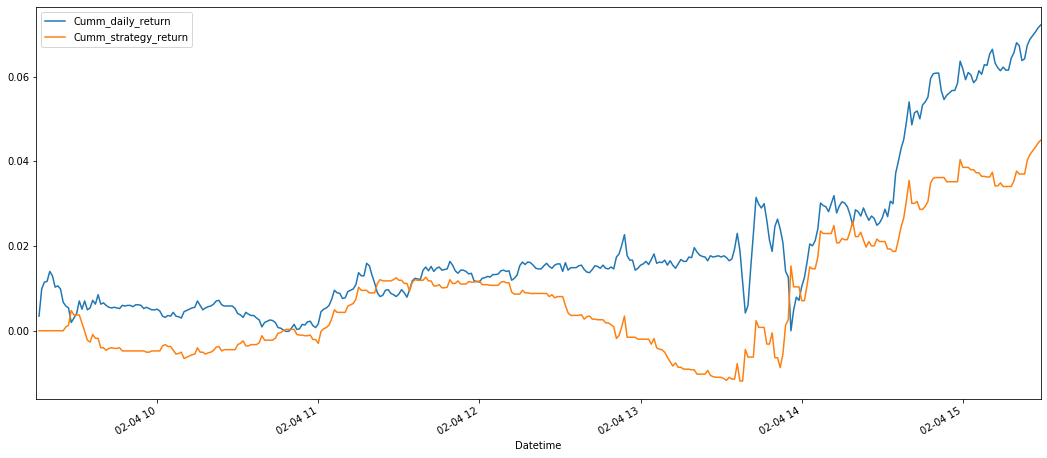

In [86]:
backtest_strategy(data,2,10,10,True)

[0.1686, 0.1087]

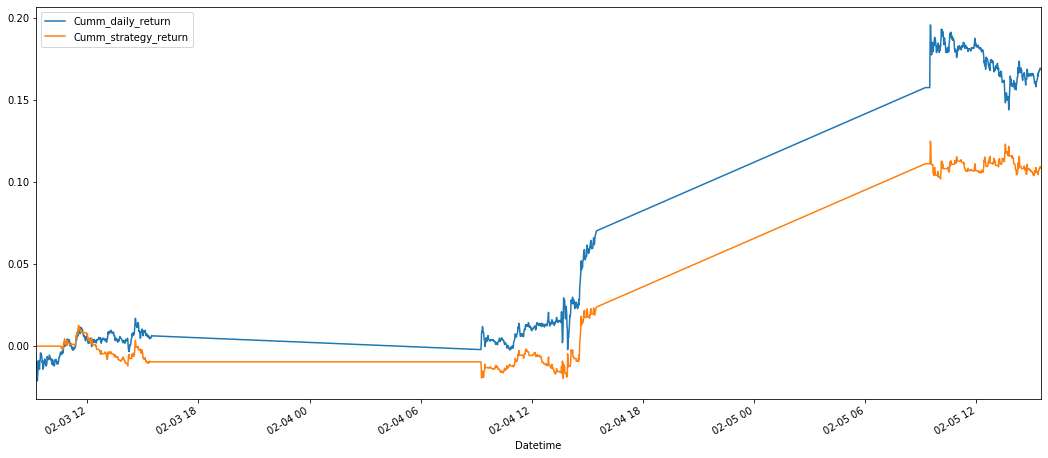

In [93]:
backtest_strategy(data,7,5,80,True)

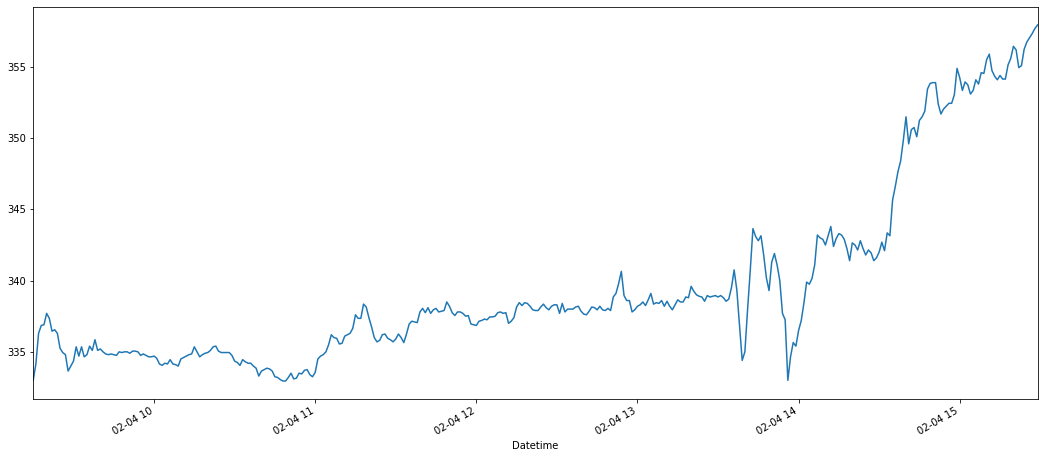

In [89]:
data['Close'].plot(figsize=(18,8))